In [3]:
import h2o
# Initialize and start an H2O cluster
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,5 days 12 hours 7 mins
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,24 days
H2O_cluster_name:,H2O_from_python_szhuang_addsht
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.942 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [4]:
from h2o.estimators import H2OGeneralizedLinearEstimator

In [5]:
# Import a sample dataset into H2O
url = "https://raw.githubusercontent.com/h2oai/h2o-tutorials/master/training/data/loan.csv"
df = h2o.import_file(url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [6]:
df.columns

['loan_amnt',
 'term',
 'int_rate',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'purpose',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'revol_util',
 'total_acc',
 'bad_loan',
 'longest_credit_length',
 'verification_status']

In [7]:
# Specify the response and predictor columns
response = "bad_loan"
predictors = df.columns
predictors.remove(response)
# Convert the response column to a factor
df[response] = df[response].asfactor()

In [8]:
# Split the data into training and validation sets
train, valid = df.split_frame(ratios=[0.8], seed=1234)

In [9]:
# Define and train the GBM model
model = H2OGeneralizedLinearEstimator(family="binomial")

In [10]:
model.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1699115688778_159


GLM Model: summary
    family    link    regularization                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Elastic Net (alpha = 0.5, lambda = 1.778E-4 )  83                            41                             4                       py_3_sid_a6c0

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.13809811212421857
RMSE: 0.3716155434373253
LogLoss: 0.43863401323003
AUC: 0.6988590368013606
AUCPR: 0.3323924270917578
Gini: 0.39771807360272127
Null degrees of freedom: 131309
Residual degrees of freedom: 131268
Null deviance: 124910.02386078707
Residual deviance: 115194.06455447047
AIC: 115278.06455447047

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.195068122740342
       0      1      Error    Rate
-----  -----  -----  -------  ------------------
0      73903  33402  0.3113   (33402.0/107305.0)
1      9616   14389  0.4006   (9616.0/24005.0)
Total  83519  47791  0.3276   (43018.0/131310.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.195068     0.40083   231
max f2                       0.106335     0.561578  321
max f0point5                 0.27559      0.362041  165
max accuracy                 0.524971     0.817531  39
max precision                0.801278     0.666667  0
max recall                   0.00093603   1         399
max specificity              0.801278     0.999991  0
max absolute_mcc             0.208971     0.233926  218
max min_per_class_accuracy   0.18248      0.643875  244
max mean_per_class_accuracy  0.176328     0.647427  250
max tns                      0.801278     107304    0
max fns                      0.801278     24003     0
max fps                      0.00093603   107305    399
max tps                      0.00093603   24005     399
max tnr                      0.801278     0.999991  0
max fnr                      0.801278     0.999917  0
max fpr                      0.00093603   1         399
max tpr                      0.00093603   1         399

Gains/Lift Table: Avg response rate: 18.28 %, avg score: 18.28 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100069                   0.520103           2.83497   2.83497            0.518265         0.570872   0.518265                    0.570872            0.0283691       0.0283691                  183.497   183.497            0.02247
2        0.0200061                   0.474932           2.50384   2.66946            0.45773          0.495655   0.488009                    0.533277            0.0250365       0.0534055                  150.384   166.946            0.0408712
3        0.0300053                   0.443875           2.27053   2.53652            0.41508          0.458395   0.463706                    0.508323            0.0227036       0.0761091                  127.053   153.652            0.0564176
4        0.0400046                   0.419346           2.22054   2.45754            0.405941         0.431004   0.449267                    0.488997            0.0222037       0.0983129

In [11]:
# Display the model summary
print(model)

Model Details
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1699115688778_159


GLM Model: summary
    family    link    regularization                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Elastic Net (alpha = 0.5, lambda = 1.778E-4 )  83                            41                             4                       py_3_sid_a6c0

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.13809811212421857
RMSE: 0.3716155434373253
LogLoss: 0.43863401323003
AUC: 0.6988590368013606
AUCPR: 0.3323924270917578
Gini: 0.39771807360272127
Null degrees of freedom: 131309
Residual degrees of freedom: 131268
Null deviance: 124910.02386078707
Residual deviance: 115194.0645544704

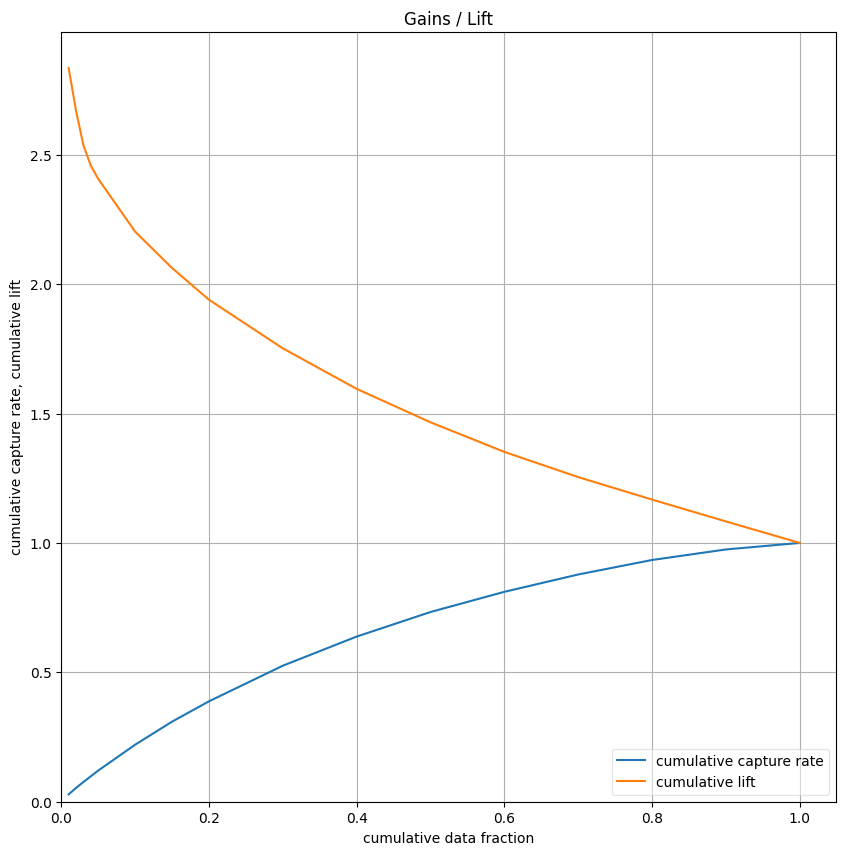

group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
1,0.0100069,0.5201031,2.8349659,2.8349659,0.5182648,0.5708716,0.5182648,0.5708716,0.0283691,0.0283691,183.4965889,183.4965889,0.0224700
2,0.0200061,0.4749318,2.5038358,2.6694638,0.4577304,0.4956546,0.4880091,0.5332774,0.0250365,0.0534055,150.3835755,166.9463846,0.0408712
3,0.0300053,0.4438751,2.2705333,2.5365207,0.4150800,0.4583952,0.4637056,0.5083230,0.0227036,0.0761091,127.0533256,153.6520733,0.0564176
4,0.0400046,0.4193455,2.2205399,2.4575406,0.4059406,0.4310036,0.4492671,0.4889968,0.0222037,0.0983129,122.0539863,145.7540554,0.0713523
5,0.0500038,0.3994312,2.2038754,2.4068152,0.4028941,0.4092748,0.4399939,0.4730548,0.0220371,0.1203499,120.3875399,140.6815249,0.0860831
6,0.1,0.3309672,1.9989025,2.2028744,0.3654227,0.3621371,0.4027111,0.4176002,0.0999375,0.2202874,99.8902488,120.2874401,0.1471967
7,0.1500038,0.2894238,1.7811599,2.0622958,0.3256168,0.3089966,0.3770117,0.3813972,0.0890648,0.3093522,78.1159918,106.2295770,0.1949959
8,0.2,0.2590569,1.5722922,1.9398042,0.2874334,0.2735057,0.3546188,0.3544264,0.0786086,0.3879608,57.2292203,93.9804207,0.2300092
9,0.3,0.2158388,1.3759633,1.7518573,0.2515422,0.2359685,0.3202599,0.3149404,0.1375963,0.5255572,37.5963341,75.1857252,0.2760161
10,0.4,0.1845314,1.1255988,1.5952926,0.2057726,0.1994354,0.2916381,0.2860641,0.1125599,0.6381171,12.5598834,59.5292647,0.2913858


In [12]:
model.gains_lift_plot()

In [13]:
# Shutdown the H2O cluster
h2o.shutdown()

H2O session _sid_a6c0 closed.


/var/folders/zk/3vgrnry578s2pljd4gcb7f6r0000gn/T/ipykernel_17893/458809621.py:2: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()
